# Calmap heatmap visualization

In [458]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

#Path
#Insert your local repo path to file 
repo_path = "INSERT YOUR LOCAL SDC-SECURITY REPO PATH HERE"
repo_path ='D:\Archivos\Social Data Challenge\data'

plt.style.use("seaborn-v0_8-dark-palette")
pd.set_option("display.max_columns", 500)
#plt.style.available

In [462]:
cuau_path = "\cuau_robo_transeunte.csv"

cuau = pd.read_csv(repo_path+cuau_path)
cuau.shape

(8802, 16)

In [463]:
cuau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8802 entries, 0 to 8801
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           8802 non-null   int64  
 1   idcarpeta    8802 non-null   int64  
 2   delito       8802 non-null   object 
 3   categoria    8802 non-null   object 
 4   colonia      8802 non-null   object 
 5   sexo_fem     8802 non-null   int64  
 6   edad         8802 non-null   int64  
 7   anio_hecho   8802 non-null   int64  
 8   mes_hecho    8802 non-null   int64  
 9   fecha_hecho  8802 non-null   object 
 10  hora_hecho   8802 non-null   object 
 11  quarter      8802 non-null   int64  
 12  hour_of_day  8802 non-null   int64  
 13  time_of_day  8802 non-null   object 
 14  crimen_lat   8802 non-null   float64
 15  crimen_lon   8802 non-null   float64
dtypes: float64(2), int64(8), object(6)
memory usage: 1.1+ MB


In [23]:
cat_cols=['delito','categoria','colonia','time_of_day']
for c in cat_cols:
    cuau[c] = cuau[c].astype("category")

In [29]:
cuau["mes_hecho"].value_counts()

1     987
3     965
2     938
5     722
12    707
8     703
10    691
4     688
7     657
11    648
6     616
9     480
Name: mes_hecho, dtype: int64

<AxesSubplot: title={'center': 'Time of Day Crime Distribution'}, ylabel='time_of_day'>

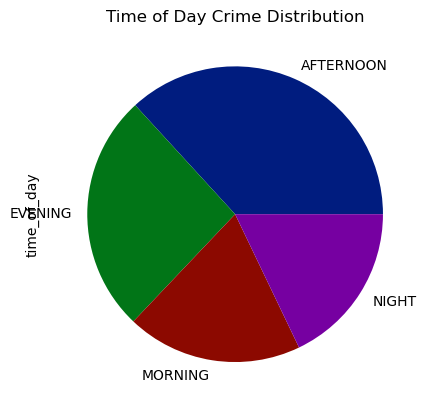

In [52]:
cuau['time_of_day'].value_counts().plot(kind = "pie", title = "Time of Day Crime Distribution")

In [196]:
value_counts = cuau[['anio_hecho','quarter']].value_counts().reset_index(name='count')
sorted_counts = value_counts.sort_values(by=['anio_hecho', 'quarter'], ascending=[True, True])
sorted_counts.reset_index(drop=True)

,anio_hecho,quarter,count
0,2016,2,3
1,2017,1,1
2,2017,4,2
3,2018,1,19
4,2018,2,4
5,2018,3,8
6,2018,4,61
7,2019,1,1097
8,2019,2,865
9,2019,3,609


In [177]:
counts = cuau.groupby([ 'anio_hecho','quarter']).size().unstack(fill_value=0)
#counts = counts.reset_index(range(1,5))
#counts['quarter'] = range(1, 5)

#counts.index = counts.index + 1

#counts.quarter >1
#counts.reset_index(inplace = True)
#counts

In [178]:
counts

quarter,1,2,3,4
anio_hecho,,,,
2016,0,3,0,0
2017,1,0,0,2
2018,19,4,8,61
2019,1097,865,609,528
2020,511,270,425,431
2021,420,412,431,481
2022,445,472,367,543
2023,397,0,0,0


In [166]:
counts.index

Int64Index([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64', name='anio_hecho')

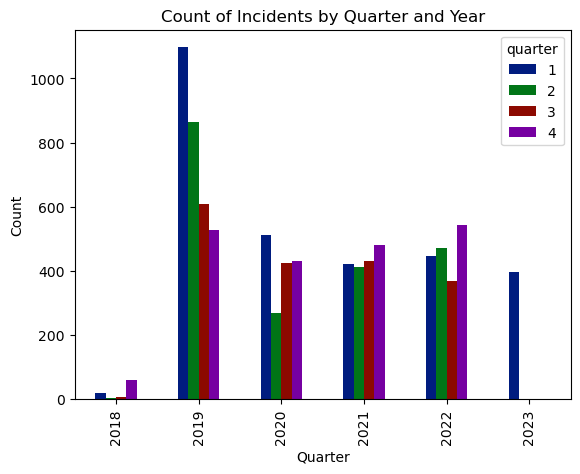

In [167]:

# Plot the bar chart
counts[counts.index > 2017].plot( kind='bar', stacked=False)

# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Count of Incidents by Quarter and Year')

# Show the plot
plt.show()

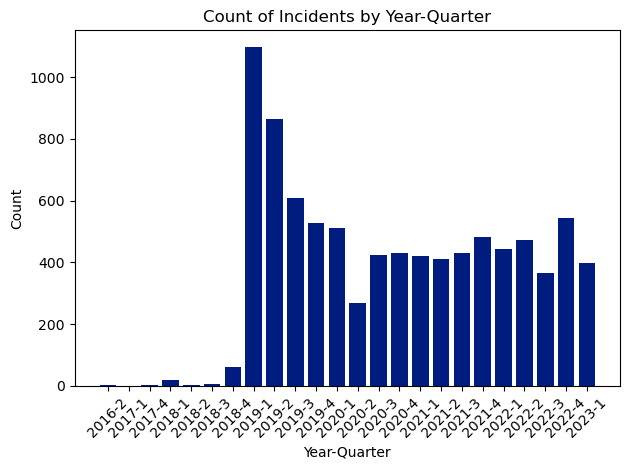

In [199]:
plt.bar(sorted_counts['anio_hecho'].astype(str) + '-' + sorted_counts['quarter'].astype(str), sorted_counts['count'])
# Add labels and title
plt.xlabel('Year-Quarter')
plt.ylabel('Count')
plt.title('Count of Incidents by Year-Quarter')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [200]:
!pip install calmap

In [201]:
import calmap

In [202]:
cuau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8802 entries, 0 to 8801
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           8802 non-null   int64   
 1   idcarpeta    8802 non-null   int64   
 2   delito       8802 non-null   category
 3   categoria    8802 non-null   category
 4   colonia      8802 non-null   category
 5   sexo_fem     8802 non-null   int64   
 6   edad         8802 non-null   int64   
 7   anio_hecho   8802 non-null   int64   
 8   mes_hecho    8802 non-null   int64   
 9   fecha_hecho  8802 non-null   object  
 10  hora_hecho   8802 non-null   object  
 11  quarter      8802 non-null   int64   
 12  hour_of_day  8802 non-null   int64   
 13  time_of_day  8802 non-null   category
 14  crimen_lat   8802 non-null   float64 
 15  crimen_lon   8802 non-null   float64 
dtypes: category(4), float64(2), int64(8), object(2)
memory usage: 862.1+ KB


In [216]:
cuau['fecha_hecho'] = pd.to_datetime(cuau['fecha_hecho'])

In [219]:
cuau.isnull().sum()

id             0
idcarpeta      0
delito         0
categoria      0
colonia        0
sexo_fem       0
edad           0
anio_hecho     0
mes_hecho      0
fecha_hecho    0
hora_hecho     0
quarter        0
hour_of_day    0
time_of_day    0
crimen_lat     0
crimen_lon     0
dtype: int64

In [270]:
#dates=cuau.groupby('fecha_hecho').size().reset_index(name ='count').sort_values(by=['fecha_hecho'])
dates=cuau.groupby('fecha_hecho').size()

In [271]:
dates

fecha_hecho
2016-05-16    1
2016-05-20    1
2016-06-19    1
2017-01-04    1
2017-10-06    1
             ..
2023-03-25    6
2023-03-26    4
2023-03-27    6
2023-03-28    5
2023-03-29    2
Length: 1561, dtype: int64

In [252]:
all_days = pd.date_range("2018-01-01", periods=1950, freq = "D")
days=np.random.choice(all_days,500)

In [253]:
all_days

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30', '2023-05-01', '2023-05-02',
               '2023-05-03', '2023-05-04'],
              dtype='datetime64[ns]', length=1950, freq='D')

In [264]:
dates

,fecha_hecho,count
0,2016-05-16,1
1,2016-05-20,1
2,2016-06-19,1
3,2017-01-04,1
4,2017-10-06,1
...,...,...
1556,2023-03-25,6
1557,2023-03-26,4
1558,2023-03-27,6
1559,2023-03-28,5


Text(0.5, 0.92, 'Robos A Transeúntes Periodo 2018-2023')

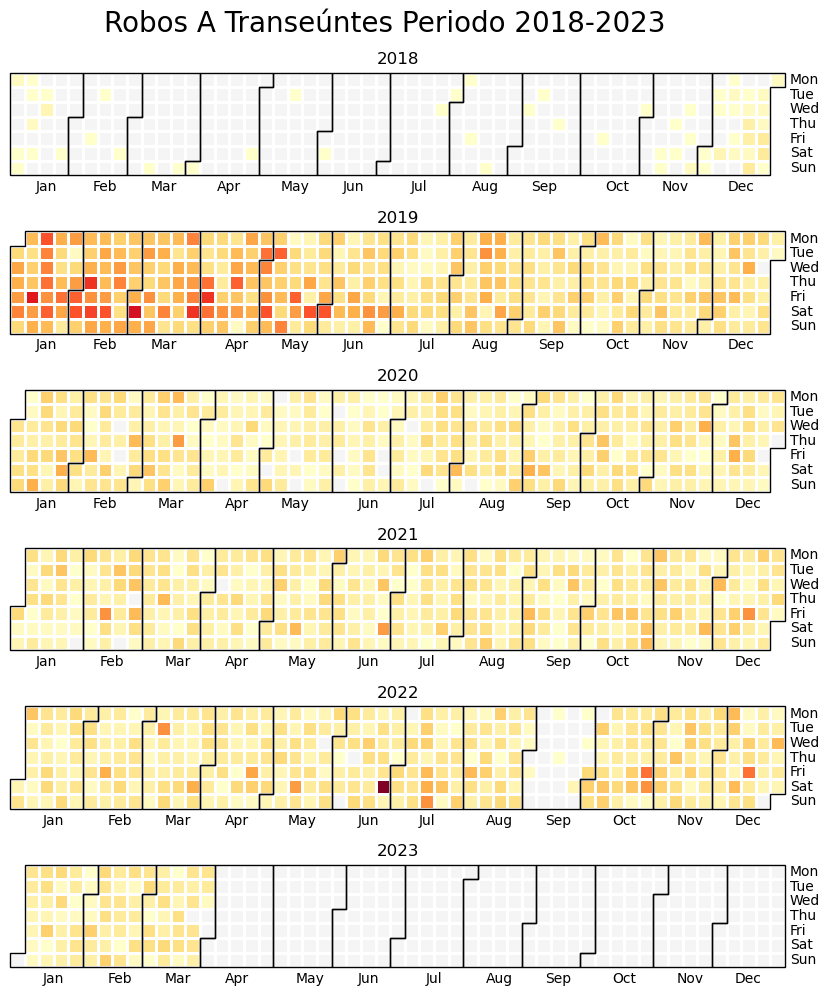

In [302]:
fig,axs=plt.subplots(6,1,figsize = (10,12))
for i, year in enumerate([2018,2019,2020,2021,2022,2023]):
    calmap.yearplot(dates, 
                    year=year, 
                    cmap = 'YlOrRd',
                    monthly_border = True,
                    ax = axs[i]
                   )
    axs[i].set_title(year)
fig.suptitle("Robos A Transeúntes Periodo 2018-2023", 
             y = 0.92, 
             fontsize = 20)

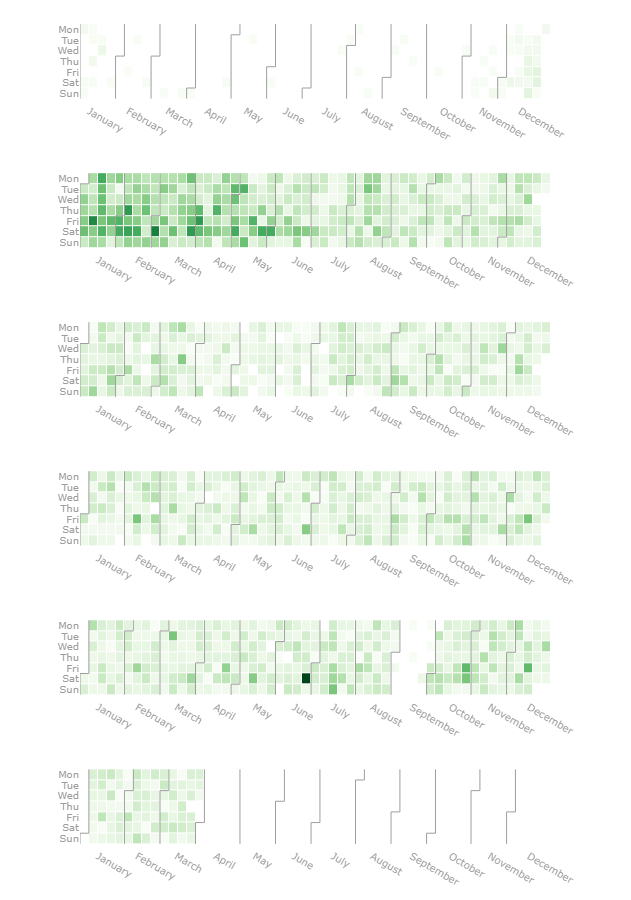

In [321]:
#!pip install plotly
from plotly_calplot import calplot

fig = calplot(
    dates.reset_index(name = 'count').query("fecha_hecho.dt.year > 2017"),
    x = 'fecha_hecho',
    y= 'count'
)
fig.show()

In [309]:
dates.reset_index(name = 'count')

,fecha_hecho,count
0,2016-05-16,1
1,2016-05-20,1
2,2016-06-19,1
3,2017-01-04,1
4,2017-10-06,1
...,...,...
1556,2023-03-25,6
1557,2023-03-26,4
1558,2023-03-27,6
1559,2023-03-28,5


In [317]:
dates.reset_index(name = 'count').query("fecha_hecho.dt.year > 2017")

,fecha_hecho,count
6,2018-01-01,2
7,2018-01-06,1
8,2018-01-07,1
9,2018-01-08,1
10,2018-01-09,1
...,...,...
1556,2023-03-25,6
1557,2023-03-26,4
1558,2023-03-27,6
1559,2023-03-28,5


In [322]:
cuau.head()

,id,idcarpeta,delito,categoria,colonia,sexo_fem,edad,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,quarter,hour_of_day,time_of_day,crimen_lat,crimen_lon
0,1,8324479,ROBO A TRANSEUNTE A BORDO DE TAXI PUBLICO Y PR...,DELITO DE BAJO IMPACTO,DOCTORES,0,39,2018,12,2018-12-25,4:00:00,4,4,NIGHT,19.42244,-99.15237
1,7,8324568,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,BUENAVISTA,1,34,2019,1,2019-01-02,19:00:00,1,19,EVENING,19.44552,-99.14842
2,12,8324684,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,CENTRO,0,54,2018,12,2018-12-23,16:30:00,4,16,AFTERNOON,19.43369,-99.12987
3,15,8324783,ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA,DELITO DE BAJO IMPACTO,SANTA MARIA LA RIBERA,0,23,2019,1,2019-01-03,22:05:00,1,22,EVENING,19.44545,-99.16442
4,17,8324805,ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA,ROBO A TRANSEUNTE EN VIA PUBLICA CON Y SIN VIO...,CENTRO,1,42,2018,12,2018-12-27,21:30:00,4,21,EVENING,19.42623,-99.13303


<AxesSubplot: ylabel='colonia'>

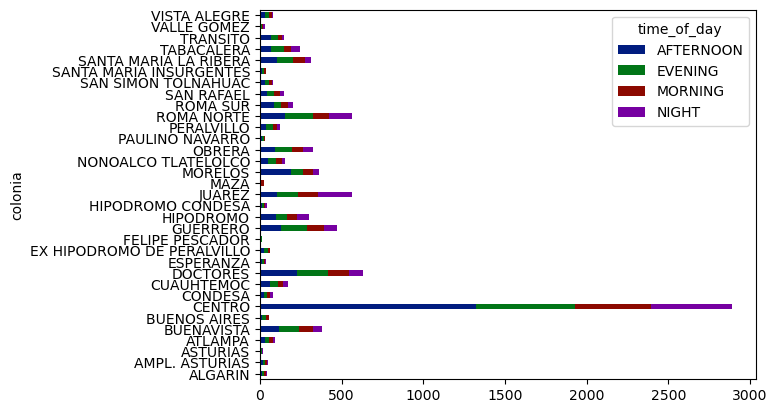

In [331]:
cuau.groupby(["colonia"])["time_of_day"].value_counts().unstack()\
        .plot(kind = 'barh', stacked = True)

In [344]:
top_colonias = (
    cuau['colonia']
    .value_counts()
    .reset_index()
    .query("colonia > 250")["index"]
    .values.tolist()
)
    

#fig,ax= plt.subplots(figsize=(10,10))


In [374]:
top_colonias

['CENTRO',
 'DOCTORES',
 'JUAREZ',
 'ROMA NORTE',
 'GUERRERO',
 'BUENAVISTA',
 'MORELOS',
 'OBRERA',
 'SANTA MARIA LA RIBERA',
 'HIPODROMO']

In [409]:

#cuau_top = cuau[cuau['colonia'].isin(top_colonias)]

cuau_top = cuau.loc[cuau['colonia'].isin(top_colonias)].reset_index(drop=True).copy()
#pivot_table = cuau_top.groupby(['colonia', 'time_of_day']).size().unstack(fill_value=0)
#pivot_table
cuau_top['colonia'] = cuau_top["colonia"].astype('str').astype('category')

In [448]:
#col_order =['MORNING','AFTERNOON','EVENING','NIGHT',]
col_order =['AFTERNOON','EVENING','NIGHT','MORNING',]
#col_order =['NIGHT','MORNING','AFTERNOON','EVENING',]

cuau_agg = (
    cuau_top.groupby(['colonia'])['time_of_day']
    #cuau.groupby(['colonia'])['time_of_day']
    .value_counts(normalize = True)
    .unstack()[col_order]
)

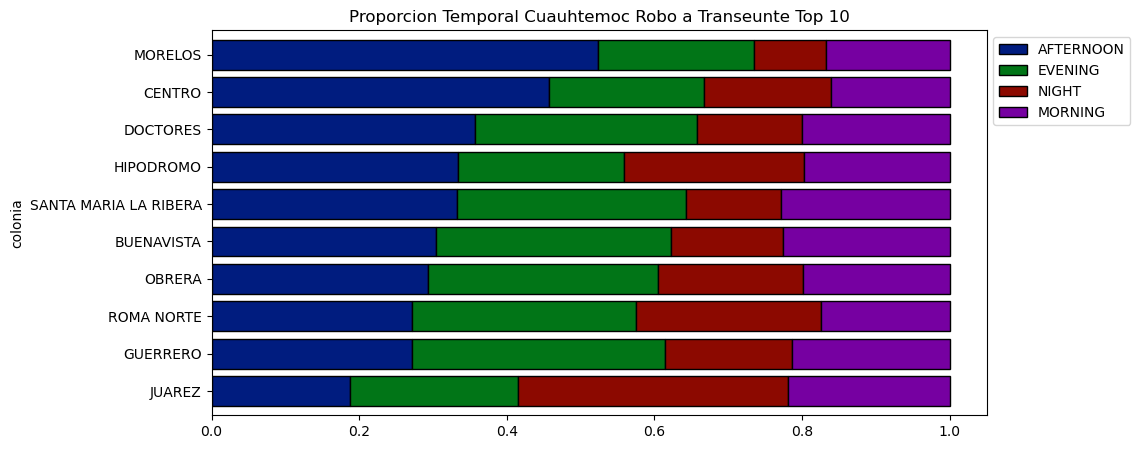

In [466]:
fig, ax = plt.subplots(figsize=(10,5))
cuau_agg.sort_values('AFTERNOON').plot(kind='barh',
                                      stacked =True, 
                                      ax = ax,
                                      width = 0.8 ,
                                      edgecolor = 'black'
                                     )
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Proporcion Temporal Cuauhtemoc Robo a Transeunte Top 10')
plt.show()